In [ ]:
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset
!unzip brain-tumor-mri-dataset.zip
!mkdir dataset
!mkdir dataset/yes
!mkdir dataset/no
!mv Training/glioma/* dataset/yes
!mv Training/meningioma/* dataset/yes
!mv Training/pituitary/* dataset/yes

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [ ]:
!mv Training/notumor/* dataset/no

In [ ]:
!mv Testing/glioma/* dataset/yes
!mv Testing/meningioma/* dataset/yes
!mv Testing/pituitary/* dataset/yes
!mv Testing/notumor/* dataset/no

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

main_dirr = 'dataset'
aug_dir = 'augmented_dataset'
os.mkdir(aug_dir)
os.mkdir(os.path.join(aug_dir,'yes'))
os.mkdir(os.path.join(aug_dir,'no'))

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=(1,1.2),
    horizontal_flip=True,
    fill_mode='nearest'
)
j,k=0,0
for label in ['yes', 'no']:
    dir_path = os.path.join(main_dirr, label)
    for img_path in os.listdir(dir_path):
        img = cv2.imread(os.path.join(dir_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.reshape((1,) + img.shape)
        for i, batch in enumerate(datagen.flow(img, batch_size=1)):
            augmented_img = batch[0]
            augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_RGB2BGR)
            augmented_img_path = os.path.join(aug_dir, label, f"{img_path.split('.')[0]}_aug_{i}.jpg")
            cv2.imwrite(augmented_img_path, augmented_img)
            if label == 'yes':
              j+=1
              print(j,k)
              if i==3 :
                break
            else:
              k+=1
              print(j,k)
              if i == 8:
                break






Streaming output truncated to the last 5000 lines.
16468 9356
16468 9357
16468 9358
16468 9359
16468 9360
16468 9361
16468 9362
16468 9363
16468 9364
16468 9365
16468 9366
16468 9367
16468 9368
16468 9369
16468 9370
16468 9371
16468 9372
16468 9373
16468 9374
16468 9375
16468 9376
16468 9377
16468 9378
16468 9379
16468 9380
16468 9381
16468 9382
16468 9383
16468 9384
16468 9385
16468 9386
16468 9387
16468 9388
16468 9389
16468 9390
16468 9391
16468 9392
16468 9393
16468 9394
16468 9395
16468 9396
16468 9397
16468 9398
16468 9399
16468 9400
16468 9401
16468 9402
16468 9403
16468 9404
16468 9405
16468 9406
16468 9407
16468 9408
16468 9409
16468 9410
16468 9411
16468 9412
16468 9413
16468 9414
16468 9415
16468 9416
16468 9417
16468 9418
16468 9419
16468 9420
16468 9421
16468 9422
16468 9423
16468 9424
16468 9425
16468 9426
16468 9427
16468 9428
16468 9429
16468 9430
16468 9431
16468 9432
16468 9433
16468 9434
16468 9435
16468 9436
16468 9437
16468 9438
16468 9439
16468 9440
16468 9441
164

Found 21577 images belonging to 2 classes.
Found 9246 images belonging to 2 classes.
171317808/171317808 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[<InputLayer name=input_layer, built=True>, <ZeroPadding2D name=conv1_pad, built=True>, <Conv2D name=conv1_conv, built=True>, <ZeroPadding2D name=pool1_pad, built=True>, <MaxPooling2D name=pool1_pool, built=True>, <BatchNormalization name=conv2_block1_preact_bn, built=True>, <Activation name=conv2_block1_preact_relu, built=True>, <Conv2D name=conv2_block1_1_conv, built=True>, <BatchNormalization name=conv2_block1_1_bn, built=True>, <Activation name=conv2_block1_1_relu, built=True>, <ZeroPadding2D name=conv2_block1_2_pad, built=True>, <Conv2D name=conv2_block1_2_conv, built=True>, <BatchNormalization name=conv2_block1_2_bn, built=True>, <Activation name=conv2_block1_2_relu, built=True>, <Conv2D name=conv2_block1_0_conv, built=True>, <Conv2D name=conv2_block1_3_conv, built=True>, <Add name=conv2_block1_out, built=True>, <BatchNormalization name=conv2_b

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet101v2 (Functional)             │ (None, 7, 7, 2048)          │      42,626,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,471,873 (211.61 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 42,626,560 (162.61 MB)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


675/675 ━━━━━━━━━━━━━━━━━━━━ 164s 212ms/step - accuracy: 0.7999 - loss: 0.4399 - val_accuracy: 0.8742 - val_loss: 0.3041
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 178s 191ms/step - accuracy: 0.9222 - loss: 0.2116 - val_accuracy: 0.8913 - val_loss: 0.2788
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 145s 196ms/step - accuracy: 0.9426 - loss: 0.1638 - val_accuracy: 0.8713 - val_loss: 0.3441
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 140s 193ms/step - accuracy: 0.9481 - loss: 0.1492 - val_accuracy: 0.8675 - val_loss: 0.3704
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 131s 193ms/step - accuracy: 0.9572 - loss: 0.1278 - val_accuracy: 0.8984 - val_loss: 0.2824
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 141s 192ms/step - accuracy: 0.9608 - loss: 0.1194 - val_accuracy: 0.8672 - val_loss: 0.4098
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 133s 196ms/step - accuracy: 0.9656 - loss: 0.1073 - val_accuracy: 0.8611 - val_loss: 0.4467
Training Accuracy: 0.96
Validation Accuracy: 0.86


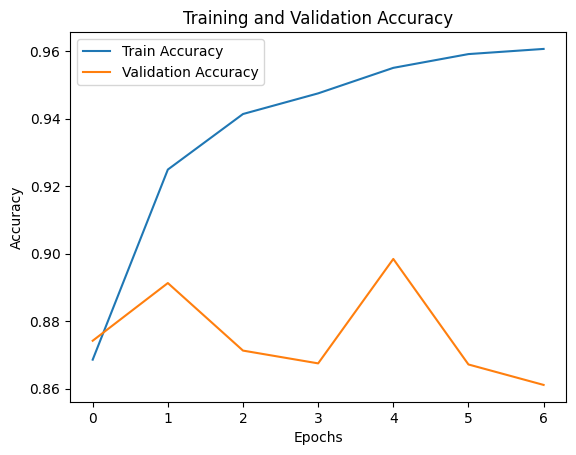

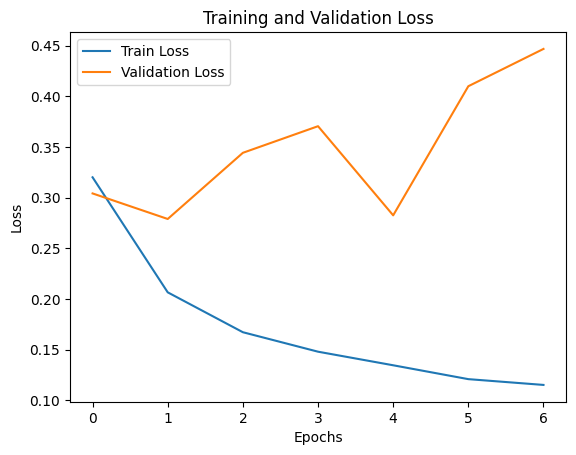

Model saved as 'brain_tumor_detection_model.h5'.


In [ ]:



def preprocessing(img):
    img = img.astype(np.uint8)*255
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8))
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    img = img.astype(np.float32)/255
    return img


data_dir = "augmented_dataset"


train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.3,
    preprocessing_function=preprocessing
)


val_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.3,
    preprocessing_function=preprocessing
)


training_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)



validation_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)



res_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

print(res_model.layers)
for layer in res_model.layers:
    layer.trainable = False


model = Sequential([
    res_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


model.compile(
    optimizer=Adam(learning_rate=0.0002),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.summary()


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


history = model.fit(
    training_data,
    epochs=20,
    validation_data=validation_data,
    callbacks = [early_stopping]

)


print(f"Training Accuracy: {history.history['accuracy'][-1]:.2f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.2f}")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the trained model
model.save("brain_tumor_detection_model.keras")
print("Model saved as 'brain_tumor_detection_model.h5'.")
